In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Power law params: [0.99414573 0.80998909]
Logistic params: [92.62113895  2.44886704  5.12904552]


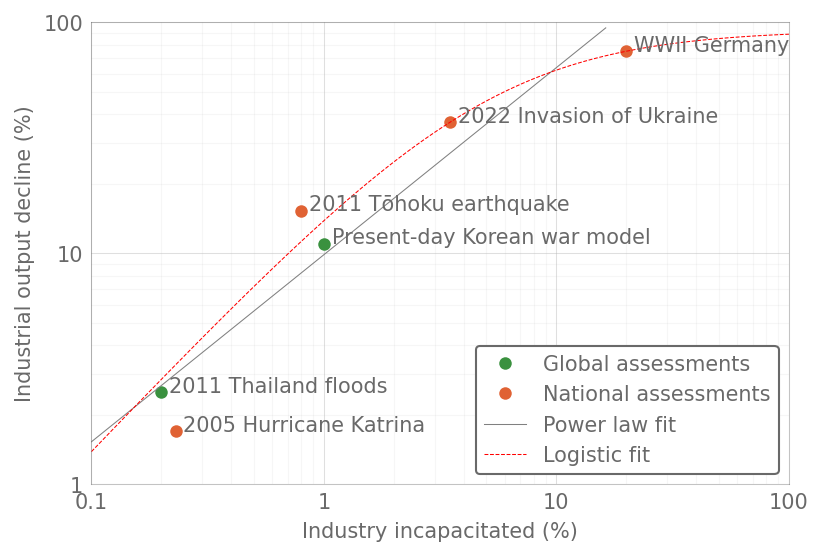

In [3]:
plt.close(1)
plt.figure(1, figsize=(6,4))

# Global numbers
x1 = np.array([0.2, 1])
y1 = np.array([2.5, 11])
labels1 = ["2011 Thailand floods", "Present-day Korean war model"]
plt.plot(x1, y1, "o", label='Global assessments')

# National numbers
x2 = np.array([0.8, 20, 3.5, 0.23])
y2 = np.array([15.3, 75, 37, 1.7])
labels2 = ["2011 Tōhoku earthquake", "WWII Germany", "2022 Invasion of Ukraine", "2005 Hurricane Katrina"]
plt.plot(x2, y2, "o", color='#e06234', label='National assessments')

# Add text labels
for i, label in enumerate(labels1):
    plt.text(x1[i]*1.08, y1[i], label, fontsize=10, ha="left")
for i, label in enumerate(labels2):
    plt.text(x2[i]*1.08, y2[i], label, fontsize=10, ha="left")

# Define power law function with a cap at 100
def power_law(x, a, b):
    return np.minimum(a * np.power(x, b), 100)

# Define logistic function
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (np.log10(x) - np.log10(x0))))

# Combine data for fitting
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

# Fit the power law function to the data in log-log space
log_x = np.log10(x)
log_y = np.log10(y)
params_power, _ = curve_fit(lambda log_x, a, b: a + b * log_x, log_x, log_y)

# Fit the logistic function to the data
params_logistic, _ = curve_fit(logistic, x, y, p0=[100, 1, 1])

# Generate x values for the fit lines
x_fit = np.logspace(np.log10(0.1), np.log10(100), 100)
y_fit_power = power_law(x_fit, 10**params_power[0], params_power[1])
y_fit_logistic = logistic(x_fit, *params_logistic)

# Plot the power law fit
print("Power law params:", params_power)
plt.plot(x_fit[y_fit_power<100], y_fit_power[y_fit_power<100], linestyle='-', color='grey', lw=0.5, label='Power law fit')

# Plot the logistic fit
print("Logistic params:", params_logistic)
plt.plot(x_fit, y_fit_logistic, linestyle='--', color='red', lw=0.5, label='Logistic fit')

ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.xlabel("Industry incapacitated (%)")
plt.ylabel("Industrial output decline (%)")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: "{:.1f}".format(val) if val < 1 else "{:.0f}".format(val)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: "{:.1f}".format(val) if val < 1 else "{:.0f}".format(val)))

for spine in ax.spines.values():
    spine.set_alpha(0.4)
    spine.set_linewidth(0.5)
    spine.set_color('dimgrey')
    spine.set_visible(True)

plt.legend()
plt.ylim(1, 100)
plt.xlim(0.1, 100)

plt.grid(True, which="minor", ls="-", alpha=0.1, lw=0.5)

plt.show()